## XGBoost

In [4]:
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import neurokit2 as nk
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Global settings
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams["figure.figsize"] = (20, 6)
plt.style.use('ggplot') # nicer plots
pd.set_option('display.max_columns', None)

### intrusion_nothink

In [ ]:
# Data loading
df = pd.read_csv('output/combined_feature_engineered_tnt_only.csv')

df['datetime'] = pd.to_datetime(df['datetime'])

# Keep rows where 'intrusion_nothink' is not NaN
df = df[df['intrusion_nothink'].notna()]

df.drop(['datetime', 'unix_time', 'source', 'response', 'intrusion', 'intrusion_tnt', 'trialcode', 'session_id'], axis=1, inplace=True)

X = df.drop('intrusion_nothink', axis=1)  # Features: All columns except 'intrusion_nothink'
y = df['intrusion_nothink']  # Labels: 'intrusion_nothink' column

# Assuming 'participant' is the column with participant IDs
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(X, y, groups=df['participant']))

# Create the training and test sets
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize an XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.63      0.66       197
         1.0       0.40      0.48      0.43       100

    accuracy                           0.58       297
   macro avg       0.55      0.55      0.55       297
weighted avg       0.60      0.58      0.59       297



### intrusion_tnt

In [14]:
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import neurokit2 as nk
import matplotlib.pyplot as plt

# Global settings
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams["figure.figsize"] = (20, 6)
plt.style.use('ggplot') # nicer plots
pd.set_option('display.max_columns', None)

# Data loading
df = pd.read_csv('output/combined_feature_engineered_tnt_only.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df.drop(['datetime', 'unix_time', 'source', 'response', 'intrusion', 'intrusion_nothink', 'trialcode', 'session_id'], axis=1, inplace=True)

X = df.drop('intrusion_tnt', axis=1)  # Features: All columns except 'intrusion_tnt'
y = df['intrusion_tnt']  # Labels: 'intrusion_tnt' column

# Assuming 'participant' is the column with participant IDs
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(X, y, groups=df['participant']))

# Create the training and test sets
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

from sklearn.impute import KNNImputer

# Initialize a new KNNImputer instance
knn_imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data
knn_imputer.fit(X_train)

# Transform the training and test data
X_train = knn_imputer.transform(X_train)
X_test = knn_imputer.transform(X_test)

In [15]:
import xgboost as xgb

# Initialize an XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       502
         1.0       0.27      0.06      0.10       100

    accuracy                           0.82       602
   macro avg       0.56      0.51      0.50       602
weighted avg       0.74      0.82      0.77       602



### Optimising intrusion_tnt

### Using gridsearch

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Initialize a new XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}


/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


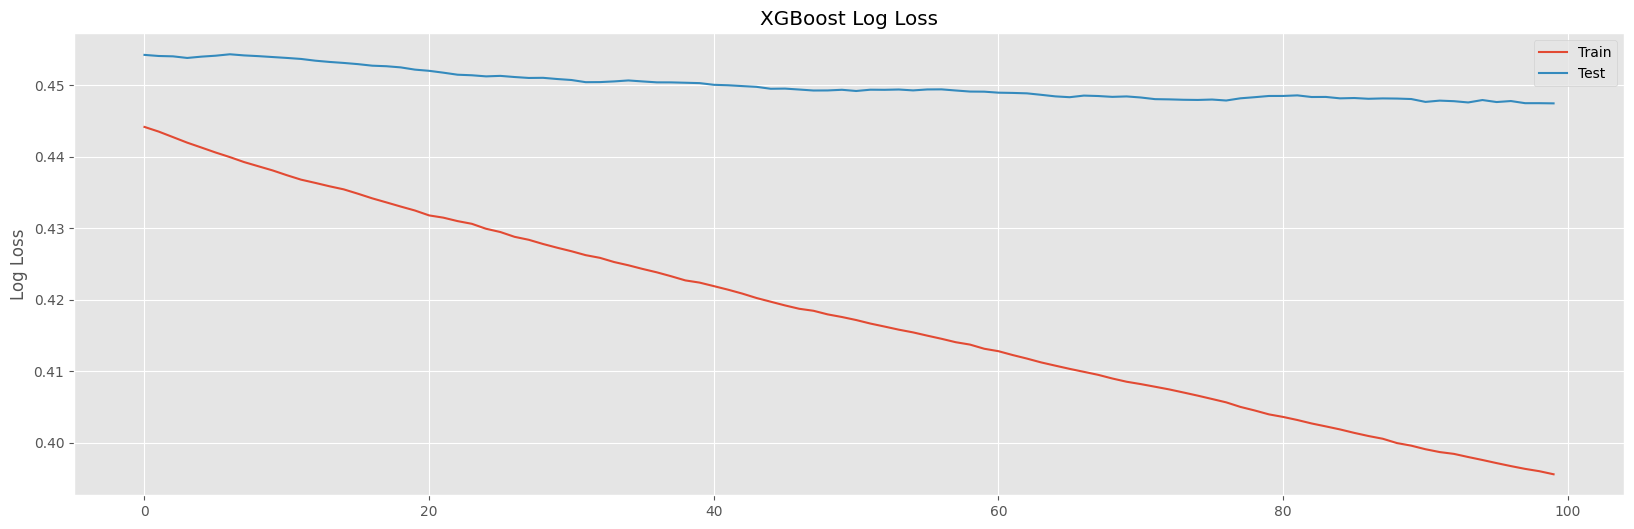

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       502
         1.0       0.00      0.00      0.00       100

    accuracy                           0.83       602
   macro avg       0.42      0.50      0.45       602
weighted avg       0.70      0.83      0.76       602



/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetric

In [17]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the best parameters
best_params = grid_search.best_params_

# Initialize a new XGBoost classifier with the best parameters
model = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42)

# Fit the model on the training data and record the evaluation history
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# Predict the labels on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

### SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

# Initialize a new SMOTE instance
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# Fit the SMOTE instance on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
# Get new class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 1653, 1.0: 826}


In [19]:
# Fit the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print(grid_search.best_params_)

{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}


/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


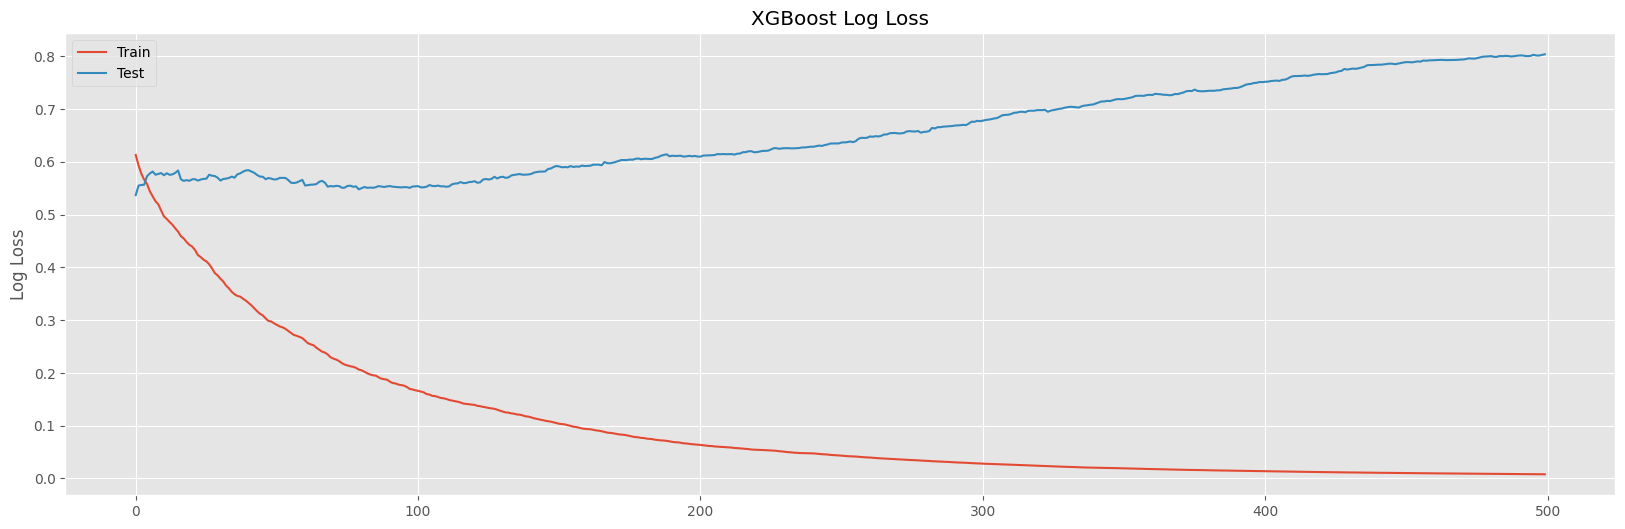

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       502
         1.0       0.21      0.12      0.15       100

    accuracy                           0.78       602
   macro avg       0.52      0.51      0.51       602
weighted avg       0.73      0.78      0.75       602



In [28]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the best parameters
best_params = grid_search.best_params_

# Initialize a new XGBoost classifier with the best parameters
model = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42)

# Fit the model on the resampled training data and record the evaluation history
eval_set = [(X_train_resampled, y_train_resampled), (X_test, y_test)]
model.fit(X_train_resampled, y_train_resampled, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

**CONCLUSION:** serious overfitting / very little benefit

### Hyperparameter tuning with Bayesian optimisation

In [29]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.metrics import f1_score

# Define the hyperparameter space
space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 100),
    'reg_lambda': hp.uniform('reg_lambda', 0.1, 5.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.1, 5.0)
}

# Define the objective function to minimize
def objective(params):
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    xgb_model = xgb.XGBClassifier(**params, objective='binary:logistic', random_state=42)
    xgb_model.fit(X_train_resampled, y_train_resampled)
    y_pred = xgb_model.predict(X_test)
    score = f1_score(y_test, y_pred)
    return {'loss': -score, 'status': STATUS_OK}

# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print("Best set of hyperparameters: ", best_params)

100%|██████████| 100/100 [01:17<00:00,  1.29trial/s, best loss: -0.33519553072625696]
Best set of hyperparameters:  {'colsample_bytree': 0.7297310552273036, 'learning_rate': 0.06505496624298951, 'max_depth': 7.0, 'n_estimators': 500.0, 'reg_alpha': 3.697075024772636, 'reg_lambda': 0.16747812541297336, 'subsample': 0.8646351484119257}


/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


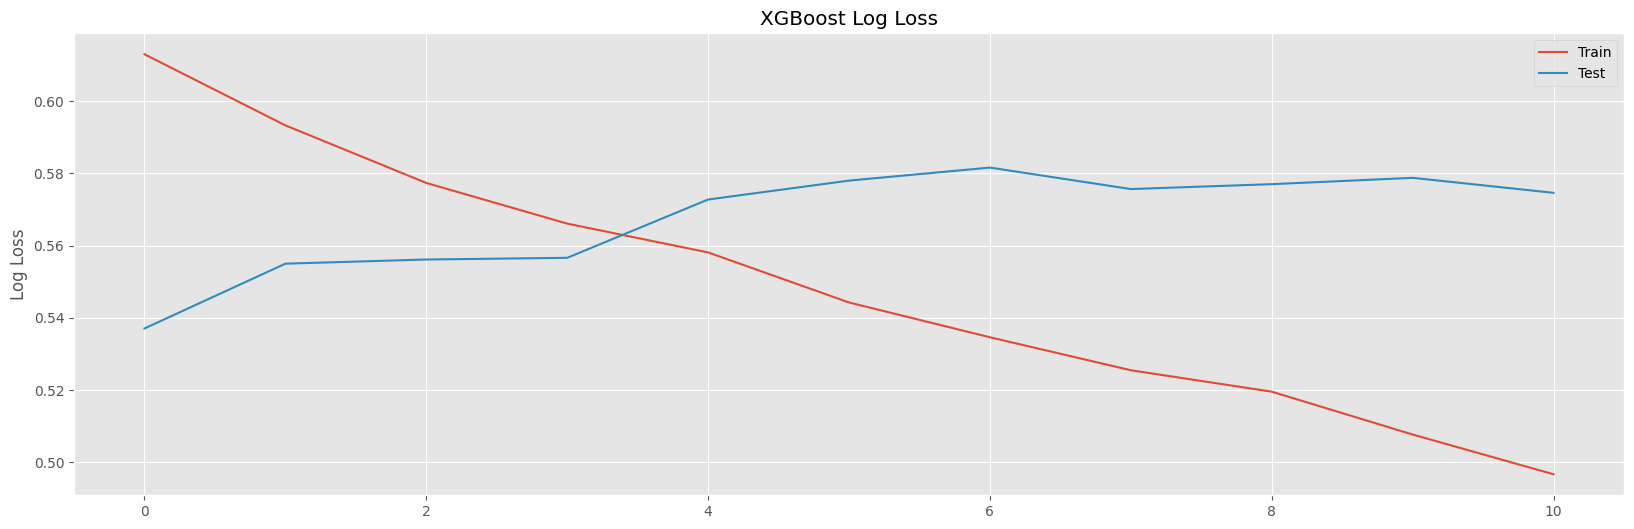

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       502
         1.0       0.00      0.00      0.00       100

    accuracy                           0.83       602
   macro avg       0.42      0.50      0.45       602
weighted avg       0.70      0.83      0.76       602



/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetric

In [32]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the best parameters
best_params = grid_search.best_params_

# Initialize a new XGBoost classifier with the best parameters
model = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42)

# Fit the model on the resampled training data and record the evaluation history
eval_set = [(X_train_resampled, y_train_resampled), (X_test, y_test)]
model.fit(X_train_resampled, y_train_resampled, eval_metric=["error", "logloss"], eval_set=eval_set, early_stopping_rounds=10, verbose=False)

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

### SVM

In [34]:
from sklearn import svm

# Initialize a new SVM classifier
model = svm.SVC(random_state=42)

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       502
         1.0       0.00      0.00      0.00       100

    accuracy                           0.83       602
   macro avg       0.42      0.50      0.45       602
weighted avg       0.70      0.83      0.76       602



/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetric

### Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize a new Logistic Regression classifier
model = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.33      0.47       502
         1.0       0.18      0.74      0.29       100

    accuracy                           0.40       602
   macro avg       0.52      0.53      0.38       602
weighted avg       0.75      0.40      0.44       602



/Users/koenraijer/Documents/00_Werk_en_studie/Msc_Data_Science_&_Society/Thesis/Preprocessing/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
